In [221]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
import missingno as msno
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import IterativeImputer
from scipy.stats import zscore

# Exploratory Data Analysis

In [4]:
df_original = pd.read_csv('./Data/brighton_cleaned_data.csv')
df_original.head()

,property_id,price,address,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,...,latitude,longitude,school_1_name,school_1_distance,school_2_name,school_2_distance,train_1_name,train_1_distance,train_2_name,train_2_distance
0,1,300000.0,"Clyde Road, Brighton BN1",flat,2.0,1.0,1.0,NaN,share of freehold,NaN,...,50.834835,-0.136658,bellerbys college brighton,0.2,downs infant school,0.3,london road (brighton),0.1,brighton,0.4
1,2,295000.0,"North Street, Brighton BN1",flat,1.0,NaN,NaN,NaN,not available,NaN,...,50.828022,-0.136807,middle street primary school,0.1,st paul's cofe primary school and nursery,0.3,brighton,0.5,london road (brighton),1.0
2,3,450000.0,"Crabtree Avenue, Brighton BN1",terraced house,3.0,1.0,2.0,NaN,freehold,NaN,...,50.860744,-0.131786,carden nursery and primary school,0.3,the dharma primary school,0.4,moulsecoomb,1.1,preston park,1.3
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,425000.0,"Warleigh Road, Brighton BN1",maisonette,2.0,1.0,1.0,NaN,leasehold,120.0,...,50.834766,-0.135156,downs infant school,0.2,downs junior school,0.3,london road (brighton),0.1,brighton,0.5


In [5]:
df1 = df_original.copy()

In [6]:
df1.columns

Index(['property_id', 'price', 'address', 'house_type', 'number_of_bedrooms',
       'number_of_bathrooms', 'number_of_receptions', 'other_features',
       'tenure', 'lease_time', 'service_charge', 'tax_band', 'ground_rent',
       'commonhold_details', 'points_of_interest', 'listing_features',
       'description_text', 'property_link', 'postcode', 'latitude',
       'longitude', 'school_1_name', 'school_1_distance', 'school_2_name',
       'school_2_distance', 'train_1_name', 'train_1_distance', 'train_2_name',
       'train_2_distance'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           5189 non-null   int64  
 1   price                 5092 non-null   float64
 2   address               5092 non-null   object 
 3   house_type            5092 non-null   object 
 4   number_of_bedrooms    4920 non-null   float64
 5   number_of_bathrooms   4791 non-null   float64
 6   number_of_receptions  4630 non-null   float64
 7   other_features        303 non-null    float64
 8   tenure                5092 non-null   object 
 9   lease_time            758 non-null    float64
 10  service_charge        1614 non-null   object 
 11  tax_band              5092 non-null   object 
 12  ground_rent           1606 non-null   object 
 13  commonhold_details    426 non-null    object 
 14  points_of_interest    5092 non-null   object 
 15  listing_features     

In [8]:
df1.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,5189.000000,5.092000e+03,4920.000000,4791.000000,4630.000000,3.030000e+02,758.000000,2554.000000,2554.000000,4645.000000,4151.000000,4645.000000,4645.000000
mean,2595.000000,5.068797e+05,2.809959,1.551242,1.464147,1.573433e+04,314.478892,50.130247,0.551715,0.339419,0.565936,1.094682,1.684952
std,1498.079604,4.594099e+05,1.513866,0.916238,0.794987,2.501740e+05,369.050449,7.516191,14.425469,0.297453,0.491676,1.114011,1.170459
min,1.000000,5.000000e+03,1.000000,1.000000,1.000000,3.600000e+01,1.000000,-45.948929,-104.771187,0.000000,0.000000,0.000000,0.100000
25%,1298.000000,2.900000e+05,2.000000,1.000000,1.000000,6.485000e+02,95.000000,50.810425,-0.220390,0.200000,0.300000,0.400000,0.900000
50%,2595.000000,4.187475e+05,3.000000,1.000000,1.000000,9.150000e+02,117.000000,50.827091,-0.136140,0.300000,0.400000,0.700000,1.400000
75%,3892.000000,6.000000e+05,4.000000,2.000000,2.000000,1.286000e+03,249.750000,50.840504,0.227991,0.400000,0.600000,1.300000,2.000000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,4.356000e+06,999.000000,56.557793,170.329300,4.500000,5.900000,7.400000,7.900000


In [10]:
sorted_df = df1.sort_values(by='price', ascending=False)
sorted_df.tail(10)

,property_id,price,address,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,...,latitude,longitude,school_1_name,school_1_distance,school_2_name,school_2_distance,train_1_name,train_1_distance,train_2_name,train_2_distance
1504,1505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1509,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1510,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1511,1512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1512,1513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,1515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,1516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1517,1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# remove rows with price value missing
df1.dropna(subset=['price'], inplace = True)

In [12]:
df2 = df1.copy()

In [13]:
sorted_df = df2.sort_values(by='price', ascending=False)
sorted_df.tail(10)

,property_id,price,address,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,...,latitude,longitude,school_1_name,school_1_distance,school_2_name,school_2_distance,train_1_name,train_1_distance,train_2_name,train_2_distance
696,697,15000.0,"New Road, Worthing BN13",land,NaN,NaN,NaN,NaN,freehold,NaN,...,50.835724,-0.418836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,1246,15000.0,"The Strand, Ferring, Worthing, West Sussex BN12",property,NaN,NaN,NaN,NaN,leasehold,NaN,...,NaN,NaN,ferring cofe primary school,0.8,chatsmore catholic high school,1.2,goring-by-sea,1.3,angmering,1.9
3670,3671,14500.0,"Emerald Quay, Shoreham-By-Sea BN43",property,NaN,NaN,NaN,NaN,not available,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3665,3666,14500.0,"Emerald Quay, Shoreham-By-Sea BN43",property,NaN,NaN,NaN,NaN,not available,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3675,3676,13000.0,"Emerald Quay, Shoreham-By-Sea BN43",property,NaN,NaN,NaN,NaN,not available,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3283,3284,10000.0,"Quinnell Drive, Hailsham BN27",land,NaN,NaN,NaN,NaN,freehold,NaN,...,50.875282,0.256387,hawkes farm academy,0.2,hailsham community college,0.6,polegate,3.8,berwick (sussex),4.6
5066,5067,10000.0,"The Street, Bramber, Sussex BN44",land,NaN,NaN,NaN,9583.0,freehold,NaN,...,50.882988,-0.312016,upper beeding primary school,0.4,the towers convent school,0.8,shoreham-by-sea,3.7,lancing,3.8
1177,1178,10000.0,"Westdean Avenue, Newhaven BN9",land,NaN,NaN,NaN,NaN,not available,NaN,...,50.784069,0.033661,seahaven academy,0.3,high cliff academy,0.4,newhaven harbour ferry terminal,1.0,newhaven harbour,1.0
5058,5059,8600.0,"Bramber, Steyning BN44",land,NaN,NaN,NaN,8712.0,freehold,NaN,...,50.882988,-0.312016,upper beeding primary school,0.4,the towers convent school,0.8,shoreham-by-sea,3.7,lancing,3.8
5037,5038,5000.0,"River Ardur, Steyning BN44",land,NaN,NaN,NaN,4356000.0,freehold,NaN,...,NaN,NaN,upper beeding primary school,0.3,the towers convent school,0.6,shoreham-by-sea,3.6,lancing,3.8


In [ ]:
df2.loc[424, "property_link"]

In [14]:
df2[df2['price'] <= 100000]

,property_id,price,address,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,...,latitude,longitude,school_1_name,school_1_distance,school_2_name,school_2_distance,train_1_name,train_1_distance,train_2_name,train_2_distance
13,14,74950.0,"UK Lodges, UK BN1",lodge,2.0,1.0,NaN,NaN,freehold,NaN,...,NaN,NaN,brighton aldridge community academy,0.7,coldean primary school,1.5,falmer,0.4,moulsecoomb,2.1
100,101,37000.0,"Braemar House, Norfolk Road, Brighton BN1",parking/garage,NaN,NaN,NaN,NaN,leasehold,NaN,...,NaN,NaN,brighton and hove high school,0.2,st mary magdalen catholic primary school,0.2,brighton,0.6,hove,1.0
424,425,87500.0,"Stroudley Road, Brighton BN1",flat,2.0,1.0,1.0,NaN,leasehold,NaN,...,50.831467,-0.139664,bellerbys college brighton,0.1,st bartholomew's cofe primary school,0.1,brighton,0.2,london road (brighton),0.4
483,484,81000.0,"Coldean Lane, Brighton BN1",flat,1.0,1.0,NaN,NaN,leasehold,250.0,...,50.861603,-0.108351,coldean primary school,0.2,carden nursery and primary school,0.9,falmer,0.9,moulsecoomb,1.3
518,519,80000.0,"Wilmington Close, Brighton, East Sussex BN1",land,NaN,NaN,NaN,NaN,not available,NaN,...,NaN,NaN,patcham high school,0.3,the dharma primary school,0.4,preston park,1.2,moulsecoomb,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,5038,5000.0,"River Ardur, Steyning BN44",land,NaN,NaN,NaN,4356000.0,freehold,NaN,...,NaN,NaN,upper beeding primary school,0.3,the towers convent school,0.6,shoreham-by-sea,3.6,lancing,3.8
5054,5055,70000.0,"Land Adjacent To Downland Park, The Street BN44",land,NaN,NaN,NaN,NaN,not available,NaN,...,NaN,NaN,upper beeding primary school,0.5,the towers convent school,0.9,shoreham-by-sea,3.8,lancing,3.9
5058,5059,8600.0,"Bramber, Steyning BN44",land,NaN,NaN,NaN,8712.0,freehold,NaN,...,50.882988,-0.312016,upper beeding primary school,0.4,the towers convent school,0.8,shoreham-by-sea,3.7,lancing,3.8
5066,5067,10000.0,"The Street, Bramber, Sussex BN44",land,NaN,NaN,NaN,9583.0,freehold,NaN,...,50.882988,-0.312016,upper beeding primary school,0.4,the towers convent school,0.8,shoreham-by-sea,3.7,lancing,3.8


In [15]:
# remove property houses less than 80000
df3 = df2[df2['price'] >= 80000].copy()

In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5016 entries, 0 to 5188
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           5016 non-null   int64  
 1   price                 5016 non-null   float64
 2   address               5016 non-null   object 
 3   house_type            5016 non-null   object 
 4   number_of_bedrooms    4895 non-null   float64
 5   number_of_bathrooms   4768 non-null   float64
 6   number_of_receptions  4607 non-null   float64
 7   other_features        298 non-null    float64
 8   tenure                5016 non-null   object 
 9   lease_time            742 non-null    float64
 10  service_charge        1587 non-null   object 
 11  tax_band              5016 non-null   object 
 12  ground_rent           1578 non-null   object 
 13  commonhold_details    426 non-null    object 
 14  points_of_interest    5016 non-null   object 
 15  listing_features     

In [17]:
df3.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,5016.000000,5.016000e+03,4895.000000,4768.000000,4607.000000,298.000000,742.000000,2515.000000,2515.000000,4575.000000,4092.000000,4575.000000,4575.000000
mean,2616.219498,5.139578e+05,2.814505,1.552433,1.466464,1318.345638,320.800539,50.119517,0.559246,0.336262,0.564052,1.094623,1.686251
std,1500.571414,4.592290e+05,1.515454,0.917729,0.796291,1720.866600,370.446935,7.573768,14.536759,0.295992,0.493220,1.115897,1.173112
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,85.000000,1.000000,-45.948929,-104.771187,0.000000,0.000000,0.000000,0.100000
25%,1291.750000,2.950000e+05,2.000000,1.000000,1.000000,651.500000,97.000000,50.811379,-0.216600,0.200000,0.300000,0.400000,0.800000
50%,2646.500000,4.250000e+05,3.000000,1.000000,1.000000,915.000000,119.000000,50.827091,-0.136593,0.300000,0.400000,0.700000,1.400000
75%,3908.250000,6.000000e+05,4.000000,2.000000,2.000000,1281.000000,250.000000,50.840504,0.207639,0.400000,0.600000,1.300000,2.000000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,13939.000000,999.000000,56.557793,170.329300,4.500000,5.900000,7.400000,7.900000


In [18]:
df3['house_type'].unique()

array(['flat', 'terraced house', 'maisonette', 'semi-detached house',
       'studio', 'property', 'town house', 'bungalow',
       'end terrace house', 'detached house', 'semi-detached bungalow',
       'cottage', 'detached bungalow', 'land', 'block of flats',
       'mews house', 'mobile/park home', 'barn conversion',
       'link-detached house', 'farmhouse', 'houseboat',
       'shared accommodation', 'terraced bungalow', 'penthouse',
       'country house', 'equestrian property', 'lodge', 'room'],
      dtype=object)

In [19]:
# removing useless house type categories
useless_house_categories = ['land', 'parking/garage', 'lodge', 'mobile/park home', 'equestrian property', 'houseboat']
df3['house_type'] = df3['house_type'].apply(lambda x: np.nan if x in useless_house_categories else x)
df3.dropna(subset=['house_type'], inplace=True)

In [20]:
df4 = df3.copy()

In [21]:
sorted_df = df4.sort_values(by='price', ascending=False)
sorted_df.head(10)

,property_id,price,address,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,...,latitude,longitude,school_1_name,school_1_distance,school_2_name,school_2_distance,train_1_name,train_1_distance,train_2_name,train_2_distance
4744,4745,15000000.0,"Kings Esplanade, Hove, Brighton & Hove BN3",town house,6.0,4.0,4.0,6284.0,freehold,NaN,...,NaN,NaN,st andrew's cofe (aided) primary school,0.4,st christopher's school,0.4,hove,0.8,aldrington,0.8
3909,3910,7500000.0,"High Street, Angmering BN16",detached house,6.0,8.0,8.0,NaN,freehold,NaN,...,50.828384,-0.476184,st wilfrids catholic primary school,0.5,the angmering school,0.6,angmering,1.0,goring-by-sea,2.0
2915,2916,7000000.0,"Sussex Mansions, Sussex Square, Brighton BN2",semi-detached house,50.0,24.0,23.0,NaN,freehold,NaN,...,NaN,NaN,st mark's cofe primary school,0.3,brighton steiner school,0.4,brighton,1.6,london road (brighton),1.8
3829,3830,6500000.0,"Tamarisk Way, East Preston, Littlehampton, Wes...",detached house,6.0,6.0,4.0,10347.0,freehold,NaN,...,NaN,NaN,georgian gardens community primary school,0.7,east preston infant school,0.7,angmering,0.9,littlehampton,2.4
735,736,5750000.0,"Long Furlong, Clapham, West Sussex BN13",detached house,5.0,4.0,4.0,NaN,freehold,NaN,...,50.841377,-0.451312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,157,5000000.0,"Withdean Road, Brighton BN1",detached house,9.0,9.0,5.0,NaN,freehold,NaN,...,50.850815,-0.135249,st bernadette's catholic primary school,0.4,lancing college preparatory school at hove,0.5,preston park,0.2,hove,1.0
2406,2407,4000000.0,"Roedean Way, Brighton BN2",detached house,7.0,7.0,3.0,NaN,freehold,NaN,...,50.827347,-0.105264,roedean school,0.3,brighton steiner school,0.4,brighton,2.4,london road (brighton),2.4
2466,2467,4000000.0,"Upper Lewes Road, Brighton BN2",terraced house,NaN,NaN,NaN,NaN,freehold,NaN,...,50.834740,-0.129622,fairlight primary school,0.2,NaN,NaN,kings brighton,0.3,brighton,0.6
2399,2400,4000000.0,"Roedean Way, Brighton, East Sussex BN2",detached house,7.0,7.0,5.0,NaN,freehold,NaN,...,NaN,NaN,roedean school,0.3,brighton steiner school,0.4,brighton,2.4,london road (brighton),2.5
3805,3806,4000000.0,"Botany Close, Rustington, West Sussex BN16",detached house,4.0,4.0,3.0,NaN,freehold,NaN,...,NaN,NaN,georgian gardens community primary school,0.6,east preston infant school,0.8,angmering,0.9,littlehampton,2.3


In [22]:
df4['house_type'].unique()

array(['flat', 'terraced house', 'maisonette', 'semi-detached house',
       'studio', 'property', 'town house', 'bungalow',
       'end terrace house', 'detached house', 'semi-detached bungalow',
       'cottage', 'detached bungalow', 'block of flats', 'mews house',
       'barn conversion', 'link-detached house', 'farmhouse',
       'shared accommodation', 'terraced bungalow', 'penthouse',
       'country house', 'room'], dtype=object)

In [23]:
property_tag = df4[df4['house_type'] == 'property']
property_tag

,property_id,price,address,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,other_features,tenure,lease_time,...,latitude,longitude,school_1_name,school_1_distance,school_2_name,school_2_distance,train_1_name,train_1_distance,train_2_name,train_2_distance
21,22,500000.0,"North Gardens, Brighton BN1",property,3.0,1.0,1.0,NaN,freehold,NaN,...,50.826317,-0.142822,st paul's cofe primary school and nursery,0.1,st mary magdalen catholic primary school,0.3,brighton,0.2,london road (brighton),0.8
34,35,800000.0,"Lucerne Road, Brighton BN1",property,4.0,1.0,2.0,NaN,freehold,NaN,...,50.842026,-0.140372,brighton and hove montessori school,0.1,downs junior school,0.3,london road (brighton),0.4,preston park,0.7
42,43,750000.0,"Withdean Rise, Preston, Brighton BN1",property,4.0,1.0,1.0,NaN,freehold,NaN,...,50.852440,-0.154646,st bernadette's catholic primary school,0.4,dorothy stringer school,0.6,preston park,0.4,hove,1.3
50,51,900000.0,"Chester Terrace, Brighton BN1",property,4.0,2.0,2.0,NaN,freehold,NaN,...,50.842236,-0.139372,brighton and hove montessori school,0.2,balfour primary school,0.3,london road (brighton),0.5,preston park,0.7
82,83,425000.0,"Kingsbury Street, Brighton BN1",property,2.0,1.0,1.0,NaN,freehold,NaN,...,50.832211,-0.134987,st bartholomew's cofe primary school,0.2,NaN,NaN,kings brighton,0.1,brighton,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,5159,1200000.0,"Malling Hill, Lewes BN7",property,5.0,3.0,3.0,NaN,freehold,NaN,...,50.880726,0.020312,south malling cofe primary and nursery school,0.2,priory school,0.8,lewes,0.8,cooksbridge,2.0
5163,5164,299950.0,"South Street, Lewes BN7",property,2.0,1.0,1.0,NaN,freehold,NaN,...,50.873116,0.021124,priory school,0.3,south malling cofe primary and nursery school,0.6,lewes,0.4,cooksbridge,2.4
5182,5183,740000.0,"Grange Road, Lewes BN7",property,4.0,2.0,1.0,NaN,freehold,NaN,...,50.870800,0.006731,western road community primary school,0.1,lewes old grammar school,0.1,lewes,0.3,cooksbridge,2.4
5184,5185,999950.0,"North Street, Lewes BN7",property,2.0,1.0,3.0,NaN,freehold,NaN,...,50.874866,0.011649,lewes old grammar school,0.3,western road community primary school,0.4,lewes,0.3,cooksbridge,2.2


In [24]:
# convert property to unknown
df4['house_type'] = df4['house_type'].apply(lambda x: 'unknown' if x == 'property' else x)

In [25]:
df4['house_type'].unique()

array(['flat', 'terraced house', 'maisonette', 'semi-detached house',
       'studio', 'unknown', 'town house', 'bungalow', 'end terrace house',
       'detached house', 'semi-detached bungalow', 'cottage',
       'detached bungalow', 'block of flats', 'mews house',
       'barn conversion', 'link-detached house', 'farmhouse',
       'shared accommodation', 'terraced bungalow', 'penthouse',
       'country house', 'room'], dtype=object)

In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 5188
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4947 non-null   int64  
 1   price                 4947 non-null   float64
 2   address               4947 non-null   object 
 3   house_type            4947 non-null   object 
 4   number_of_bedrooms    4844 non-null   float64
 5   number_of_bathrooms   4720 non-null   float64
 6   number_of_receptions  4560 non-null   float64
 7   other_features        285 non-null    float64
 8   tenure                4947 non-null   object 
 9   lease_time            735 non-null    float64
 10  service_charge        1580 non-null   object 
 11  tax_band              4947 non-null   object 
 12  ground_rent           1570 non-null   object 
 13  commonhold_details    426 non-null    object 
 14  points_of_interest    4947 non-null   object 
 15  listing_features     

In [27]:
# change other features to size
df4 = df4.rename(columns={'other_features': 'property_size'})
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 5188
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4947 non-null   int64  
 1   price                 4947 non-null   float64
 2   address               4947 non-null   object 
 3   house_type            4947 non-null   object 
 4   number_of_bedrooms    4844 non-null   float64
 5   number_of_bathrooms   4720 non-null   float64
 6   number_of_receptions  4560 non-null   float64
 7   property_size         285 non-null    float64
 8   tenure                4947 non-null   object 
 9   lease_time            735 non-null    float64
 10  service_charge        1580 non-null   object 
 11  tax_band              4947 non-null   object 
 12  ground_rent           1570 non-null   object 
 13  commonhold_details    426 non-null    object 
 14  points_of_interest    4947 non-null   object 
 15  listing_features     

In [28]:
df4['property_size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4947 entries, 0 to 5188
Series name: property_size
Non-Null Count  Dtype  
--------------  -----  
285 non-null    float64
dtypes: float64(1)
memory usage: 77.3 KB


In [29]:
df4['property_size'].unique()

array([   nan,  1205.,   624.,  1225.,   753.,  1070.,   748.,   912.,
         549.,   818.,   540.,   735.,  1786.,   839.,  1334.,  1517.,
        1423.,   674.,   807.,  1011.,   592.,   495.,   645.,   904.,
        1457.,   950.,   614.,  2540.,   930.,  1218.,  1195.,  1077.,
        1074.,  1131.,   663.,   848.,  1296.,  1098.,   678.,  1543.,
         462.,  1096.,  1055.,   743.,   915.,  2155.,   995.,  3247.,
        1350.,  1783.,  1325.,   460.,   392.,   438.,   660.,   469.,
         396.,  1378.,  1206.,   506.,   969.,  1733.,  1184.,   850.,
        1324.,  1281.,  2174.,   936.,   990.,  1141.,  1303.,   417.,
        1531.,  1152.,   657.,   538.,  1259.,   646.,   334.,   509.,
         484.,   786.,  1000.,   957.,   796.,   430.,   562.,   721.,
         516.,   635.,  1033.,  2886.,   710.,   971.,  1601.,  1214.,
        2674.,   731.,   309.,   241.,   459.,   834.,  2619.,  2057.,
         725.,   426.,   705.,   356.,   376.,  1805.,   744.,   566.,
      

In [30]:
df5 = df4.copy()

In [31]:
## Dropping irrelevant columns
df5.drop(columns=['address', 'commonhold_details', 'points_of_interest', 'school_1_name', 
                           'school_2_name', 'train_1_name','train_2_name'], inplace=True)

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4947 non-null   int64  
 1   price                 4947 non-null   float64
 2   house_type            4947 non-null   object 
 3   number_of_bedrooms    4844 non-null   float64
 4   number_of_bathrooms   4720 non-null   float64
 5   number_of_receptions  4560 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4947 non-null   object 
 8   lease_time            735 non-null    float64
 9   service_charge        1580 non-null   object 
 10  tax_band              4947 non-null   object 
 11  ground_rent           1570 non-null   object 
 12  listing_features      4891 non-null   object 
 13  description_text      4947 non-null   object 
 14  property_link         4947 non-null   object 
 15  postcode             

In [37]:
df5.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,4947.000000,4.947000e+03,4844.000000,4720.000000,4560.000000,285.000000,735.000000,2489.000000,2489.000000,4506.000000,4028.000000,4506.000000,4506.000000
mean,2608.810592,5.144891e+05,2.817300,1.551907,1.467544,1125.954386,323.627211,50.111860,0.563834,0.330448,0.554022,1.079383,1.667221
std,1502.961364,4.545914e+05,1.517828,0.917823,0.797726,971.872960,371.066112,7.612863,14.612432,0.287166,0.481880,1.105781,1.158355
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,241.000000,1.000000,-45.948929,-104.771187,0.000000,0.000000,0.000000,0.100000
25%,1285.500000,2.999500e+05,2.000000,1.000000,1.000000,653.000000,97.500000,50.811371,-0.226399,0.200000,0.300000,0.400000,0.800000
50%,2629.000000,4.250000e+05,3.000000,1.000000,1.000000,915.000000,119.000000,50.827091,-0.137287,0.300000,0.400000,0.700000,1.400000
75%,3909.500000,6.000000e+05,4.000000,2.000000,2.000000,1270.000000,250.000000,50.840500,0.154603,0.400000,0.600000,1.200000,2.000000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,10347.000000,999.000000,56.557793,170.329300,4.500000,5.900000,7.400000,7.900000


In [45]:
df5[df5['property_size'] >= 4000]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
3706,3707,2250000.0,detached house,5.0,4.0,NaN,4263.0,freehold,NaN,NaN,...,Freehold\n,"this exceptional grade-i listed, five-bedroom ...",https://www.zoopla.co.uk/for-sale/details/6486...,BN6,NaN,NaN,0.2,0.9,1.3,2.3
3711,3712,3950000.0,detached house,8.0,6.0,NaN,6564.0,freehold,NaN,NaN,...,Freehold\n,at the very end of a quiet country lane lies t...,https://www.zoopla.co.uk/for-sale/details/6480...,BN6,NaN,NaN,0.3,NaN,1.3,3.8
3712,3713,3950000.0,detached house,7.0,4.0,5.0,6267.0,freehold,NaN,NaN,...,Freehold\n6 - 7 bedrooms\n5 reception rooms\n4...,the old rectory is a stunning former rectory t...,https://www.zoopla.co.uk/for-sale/details/6480...,BN6,NaN,NaN,0.6,NaN,1.6,4.0
3829,3830,6500000.0,detached house,6.0,6.0,4.0,10347.0,freehold,NaN,NaN,...,Freehold\n6 bedrooms\n4 reception rooms\n6 bat...,"a magnificent, triple-height vaulted entrance ...",https://www.zoopla.co.uk/for-sale/details/6491...,BN16,NaN,NaN,0.7,0.7,0.9,2.4
4744,4745,15000000.0,town house,6.0,4.0,4.0,6284.0,freehold,NaN,NaN,...,Freehold\nPrivate garden\nTerrace\nBalcony\nOf...,a unique seafront complex with an exceptional ...,https://www.zoopla.co.uk/new-homes/details/621...,BN3,NaN,NaN,0.4,0.4,0.8,0.8


In [47]:
df5.loc[3712, 'property_link']

'https://www.zoopla.co.uk/for-sale/details/64808870/?search_identifier=a92942ce0d355be4df57133b411066c42a6189d01e5e57e73334248e4263c210'

In [35]:
df5.loc[4738, 'property_size'] = 832

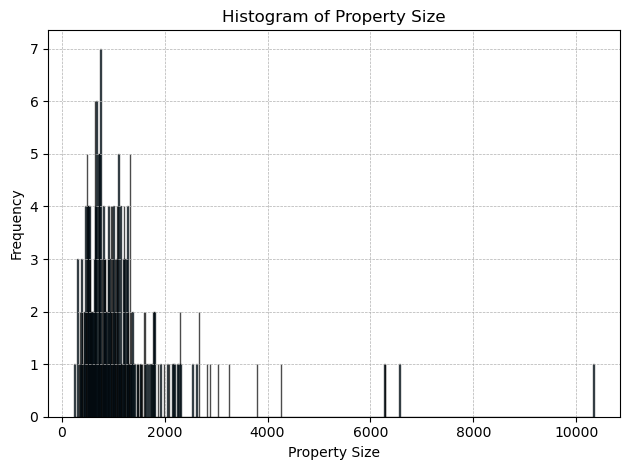

In [44]:
plt.hist(df5['property_size'], bins=1000, edgecolor='black', alpha=0.7)
plt.title('Histogram of Property Size')
plt.xlabel('Property Size')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

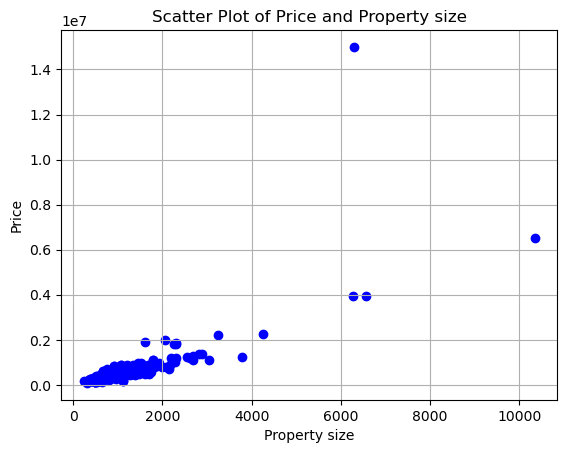

In [236]:
# Scatter plot of price and size
plt.scatter(df5['property_size'], df5['price'], color='blue', marker='o')
plt.title('Scatter Plot of Price and Property size')
plt.xlabel('Property size')
plt.ylabel('Price')
plt.grid(True)

plt.show()

In [48]:
df6 = df5.copy()

In [49]:
df6['tenure'].unique()

array(['share of freehold', 'not available', 'freehold', 'leasehold',
       'leasehold shared own', 'commonhold'], dtype=object)

In [50]:
df6[df6['tenure'].isna()]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance


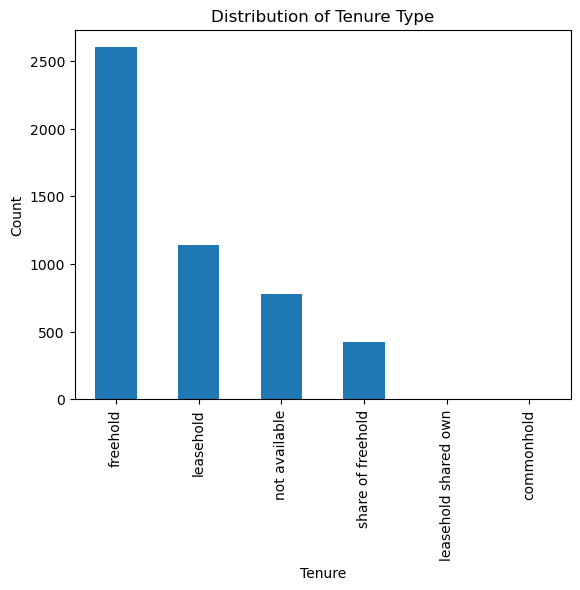

In [52]:
# Plot distribution
df6['tenure'].value_counts().plot(kind='bar')
plt.title('Distribution of Tenure Type')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [54]:
df7 = df6.copy()

In [55]:
df7['lease_time']

0         NaN
1         NaN
2         NaN
4       120.0
6       117.0
        ...  
5183      NaN
5184      NaN
5185    125.0
5186      NaN
5188      NaN
Name: lease_time, Length: 4947, dtype: float64

In [56]:
# assign 0 as lease_time for freehold properties
df7['lease_time'] = df7.apply(lambda row: 0 if row['tenure'] == 'freehold' else row['lease_time'], axis=1)

In [57]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4947 non-null   int64  
 1   price                 4947 non-null   float64
 2   house_type            4947 non-null   object 
 3   number_of_bedrooms    4844 non-null   float64
 4   number_of_bathrooms   4720 non-null   float64
 5   number_of_receptions  4560 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4947 non-null   object 
 8   lease_time            3336 non-null   float64
 9   service_charge        1580 non-null   object 
 10  tax_band              4947 non-null   object 
 11  ground_rent           1570 non-null   object 
 12  listing_features      4891 non-null   object 
 13  description_text      4947 non-null   object 
 14  property_link         4947 non-null   object 
 15  postcode             

In [58]:
df8 = df7.copy()

In [59]:
df8['service_charge'].unique()

array(['1100', nan, 'Not available', '254', '1412', '1200', '1254',
       '3560', '600', '1320', '3792', '1424', '1034', '1000', '1274',
       '2560', '1135', '2608', '720', '1375', '2775', '2220', '250',
       '300', '2600', '651', '1564', '1330', '3540', '2974', '840',
       '1781', '1080', '4333', '1126', '2326', '1788', '2080', '1210',
       '1404', '3952', '2240', '1668', '1017', '480', '1778', '1716',
       '543', '1360', '1280', '4167', '900', '1500', '3800', '3387',
       '1600', '260', '3332', '1700', '284', '3252', '2686', '764',
       '2500', '943', '2097', '8130', '1300', '867', '3161', '1640',
       '918', '2204', '50', '1132', '110', '9988', '1514', '84',
       '1 years', '1398', '1062', '1750', '999', '1896', '1685', '758',
       '425', '2200', '850', '1800', '1095', '500', '725', '4038', '1400',
       '1442', '8126', '5000', '2392', '3999', '2800', '2519', '4382',
       '2620', '2000', '1969', '4376', '2260', '7044', '140', '3600',
       '2300', '3737', '8

In [60]:
def fix_service_charge(value):
    if isinstance(value, str):
        value = value.replace(',', '').replace('$', '').strip()  # Remove potential commas and dollar signs
        if 'per quarter' in value:
            value = value.replace('per quarter', '').strip()
            value = float(value) * 4
        elif 'years' in value:
            value = value.replace('years', '').strip()
            value = float(value)
        elif 'Not available' in value:
            value = np.nan
        else:
#             print(value)
            value = float(value)
    else:
        value = np.nan
    return value

df8['service_charge'] = df8['service_charge'].apply(fix_service_charge)

In [61]:
df8['service_charge']

0       1100.0
1          NaN
2          NaN
4          NaN
6          NaN
         ...  
5183    4446.0
5184       NaN
5185    1290.0
5186    4689.0
5188       NaN
Name: service_charge, Length: 4947, dtype: float64

In [62]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4947 non-null   int64  
 1   price                 4947 non-null   float64
 2   house_type            4947 non-null   object 
 3   number_of_bedrooms    4844 non-null   float64
 4   number_of_bathrooms   4720 non-null   float64
 5   number_of_receptions  4560 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4947 non-null   object 
 8   lease_time            3336 non-null   float64
 9   service_charge        584 non-null    float64
 10  tax_band              4947 non-null   object 
 11  ground_rent           1570 non-null   object 
 12  listing_features      4891 non-null   object 
 13  description_text      4947 non-null   object 
 14  property_link         4947 non-null   object 
 15  postcode             

In [63]:
df9 = df8.copy()

In [64]:
df9['tax_band'].unique()

array(['A', 'Not available', 'C', 'D',
       'A band has not yet been confirmed.', 'F', 'B', 'E', 'G',
       'New build', 'H', 'A band has not yet been assigned',
       'The property is not currently residential so does not pay council tax. Once the build is complete, the property will need to be assessed for rates.',
       'a band has not been assigned yet'], dtype=object)

In [65]:
tax_bands = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

def fix_tax_band(text):
    if isinstance(text, str):
        text = text.lower()
        if text in tax_bands:
            text = text.upper()
        elif (text == 'not available' or text == 'a band has not yet been confirmed.' or text == 'new build' or
             text == 'a band has not yet been assigned' or text == 'a band has not been assigned yet'):
            text = 'unknown'
        else:
            text = np.nan
    else:
        text = np.nan
    return text
df9['tax_band'] = df9['tax_band'].apply(fix_tax_band)

In [66]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4947 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4947 non-null   int64  
 1   price                 4947 non-null   float64
 2   house_type            4947 non-null   object 
 3   number_of_bedrooms    4844 non-null   float64
 4   number_of_bathrooms   4720 non-null   float64
 5   number_of_receptions  4560 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4947 non-null   object 
 8   lease_time            3336 non-null   float64
 9   service_charge        584 non-null    float64
 10  tax_band              4946 non-null   object 
 11  ground_rent           1570 non-null   object 
 12  listing_features      4891 non-null   object 
 13  description_text      4947 non-null   object 
 14  property_link         4947 non-null   object 
 15  postcode             

In [67]:
df9[df9['tax_band'].isna()]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
516,517,599950.0,unknown,3.0,3.0,1.0,NaN,freehold,0.0,NaN,...,Freehold\nA Rare Opportunity For A ‘Grand Desi...,a rare opportunity to purchase a freehold form...,https://www.zoopla.co.uk/for-sale/details/6401...,BN1,NaN,NaN,0.7,1.6,0.5,2.2


In [68]:
df9.loc[516, 'description_text']

'a rare opportunity to purchase a freehold former stables building in the idyllic falmer village. planning permission has been granted to convert the listed stables into a 3 bedroom home.\n\na truly rare opportunity to purchase this freehold listed former stable building in an idyllic setting surrounded by the downs and a grade ii listed barn, church & granary. planning permission has been granted for conversion of the stable building into one dwelling (planning application number sdnp/21/01818/ful). the proposed conversion would incorporate 3 bedrooms, two en-suites and a separate bathroom, a kitchen / dining room with separate utility / wc, a living room and includes an area ideal for a garden and off-road parking.\n\naccording to the heritage report, the stables building dates back to at least the 18th century as it appears on estate maps of 1799-1800, and is a curtilage listed building, being adjacent to the grade ii listed barn to the north. the stable buildings extend to approxim

In [69]:
df9.dropna(subset=['tax_band'], inplace=True)

In [70]:
df9[df9['tax_band'].isna()]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,listing_features,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance


In [71]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4946 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4946 non-null   int64  
 1   price                 4946 non-null   float64
 2   house_type            4946 non-null   object 
 3   number_of_bedrooms    4843 non-null   float64
 4   number_of_bathrooms   4719 non-null   float64
 5   number_of_receptions  4559 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4946 non-null   object 
 8   lease_time            3335 non-null   float64
 9   service_charge        584 non-null    float64
 10  tax_band              4946 non-null   object 
 11  ground_rent           1570 non-null   object 
 12  listing_features      4890 non-null   object 
 13  description_text      4946 non-null   object 
 14  property_link         4946 non-null   object 
 15  postcode             

In [72]:
df10 = df9.copy()

In [73]:
df10['ground_rent'].unique()

array(['Not available', nan, '175', '48', '200', '250', '150', '400',
       '100', '195', '10', '80', '280', '125', '350', '75', '25', '1',
       '120', '330', '60', '657', '169', '0', '50', '300', '145', '385',
       '455', '434', '274', '206', '307', '93', '435', '13', '410', '360',
       '165', '220', '510', '15', '20', '218', '365', '160', '140', '550',
       '950', '816', '439', '225', '440', '27', '418', '1848', '331',
       '30', '63', '179', '189', '95', '180', '472', '425', '500', '1107',
       '240', '389', '213', '450', '70', '582', '236', '285', '57', '190',
       '465', '38', '40', '45', '462', '580', '90', '513', '520'],
      dtype=object)

In [74]:
# converting column to numeric
df10['ground_rent'] = pd.to_numeric(df10['ground_rent'], errors='coerce')

In [122]:
# assign 0 as ground_rent for freehold properties
df10['ground_rent'] = df10.apply(lambda row: 0 if row['tenure'] == 'freehold' else row['ground_rent'], axis=1)

In [123]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4946 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4946 non-null   int64  
 1   price                 4946 non-null   float64
 2   house_type            4946 non-null   object 
 3   number_of_bedrooms    4843 non-null   float64
 4   number_of_bathrooms   4719 non-null   float64
 5   number_of_receptions  4559 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4946 non-null   object 
 8   lease_time            3335 non-null   float64
 9   service_charge        584 non-null    float64
 10  tax_band              4946 non-null   object 
 11  ground_rent           2898 non-null   float64
 12  listing_features      4890 non-null   object 
 13  description_text      4946 non-null   object 
 14  property_link         4946 non-null   object 
 15  postcode             

In [124]:
df11 = df10.copy()

In [125]:
# converting text to lowercase
df11['description_text'] = df11['description_text'].str.lower()
df11['description_text']

0       description\n\na wonderful split-level apartme...
1       perfect investment property or first time buy!...
2       summary of accommodation\n\nground floor entra...
4       avard estate agents are pleased to offer for s...
6       summary\na well-presented top floor apartment ...
                              ...                        
5183    summary\nchain free second floor retirement fl...
5184    a unique grade ii listed property spanning ove...
5185    final one bedroom apartment remaining; plot 4a...
5186    summary\nnestled in the heart lewes is this 2 ...
5188    a modernised, first floor retirement apartment...
Name: description_text, Length: 4946, dtype: object

In [126]:
df12 = df11.copy()

In [127]:
# drop rows where listing features are NaN
df12.dropna(subset=['listing_features'], inplace=True)

In [128]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4890 non-null   int64  
 1   price                 4890 non-null   float64
 2   house_type            4890 non-null   object 
 3   number_of_bedrooms    4788 non-null   float64
 4   number_of_bathrooms   4695 non-null   float64
 5   number_of_receptions  4533 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4890 non-null   object 
 8   lease_time            3335 non-null   float64
 9   service_charge        583 non-null    float64
 10  tax_band              4890 non-null   object 
 11  ground_rent           2897 non-null   float64
 12  listing_features      4890 non-null   object 
 13  description_text      4890 non-null   object 
 14  property_link         4890 non-null   object 
 15  postcode             

In [129]:
# drop rows where only property_id, postcode, and property_link are present
cols_to_check = ['property_id', 'postcode', 'property_link']
df12 = df12[~(df12[cols_to_check].notna().all(axis=1) & df12.drop(columns=cols_to_check).isna().all(axis=1))]

In [130]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 5188
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4890 non-null   int64  
 1   price                 4890 non-null   float64
 2   house_type            4890 non-null   object 
 3   number_of_bedrooms    4788 non-null   float64
 4   number_of_bathrooms   4695 non-null   float64
 5   number_of_receptions  4533 non-null   float64
 6   property_size         285 non-null    float64
 7   tenure                4890 non-null   object 
 8   lease_time            3335 non-null   float64
 9   service_charge        583 non-null    float64
 10  tax_band              4890 non-null   object 
 11  ground_rent           2897 non-null   float64
 12  listing_features      4890 non-null   object 
 13  description_text      4890 non-null   object 
 14  property_link         4890 non-null   object 
 15  postcode             

In [131]:
df13 = df12.copy()

In [132]:
# add address to eliminate duplicate values
df13 = pd.merge(df13, df_original[['property_id', 'address']], on='property_id', how='left')

In [133]:
sorted_df13 = df13.sort_values(by='address')

# Filter rows that are duplicated based on the specified columns
duplicates = sorted_df13[sorted_df13.duplicated(subset=['price', 'house_type', 'postcode', 'latitude', 'longitude', 'address'])]

In [134]:
duplicates

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,description_text,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance,address
1630,1772,379995.0,detached house,3.0,2.0,2.0,NaN,not available,NaN,NaN,...,this three bedroom home has a spacious lounge ...,https://www.zoopla.co.uk/new-homes/details/651...,BN22,NaN,NaN,0.3,0.5,1.0,1.2,"""Ennerdale"" at St. Martins Road, Eastbourne BN22"
1664,1806,499995.0,detached house,4.0,2.0,2.0,NaN,not available,NaN,NaN,...,"receive £24,990 plus a contribution towards fl...",https://www.zoopla.co.uk/new-homes/details/649...,BN22,NaN,NaN,0.3,0.5,1.0,1.2,"""Exeter"" at St. Martins Road, Eastbourne BN22"
1665,1807,554995.0,detached house,4.0,2.0,3.0,NaN,not available,NaN,NaN,...,"receive £27,740 plus a contribution towards fl...",https://www.zoopla.co.uk/new-homes/details/649...,BN22,NaN,NaN,0.3,0.5,1.0,1.2,"""Holden"" at St. Martins Road, Eastbourne BN22"
1822,1968,519995.0,detached house,5.0,2.0,3.0,NaN,not available,NaN,NaN,...,"receive £25,990 plus a contribution towards fl...",https://www.zoopla.co.uk/new-homes/details/622...,BN22,NaN,NaN,0.3,0.5,1.0,1.2,"""Lamberton"" at St. Martins Road, Eastbourne BN22"
3652,3879,369995.0,semi-detached house,2.0,1.0,1.0,NaN,not available,NaN,NaN,...,the open-plan living/dining room will be the h...,https://www.zoopla.co.uk/new-homes/details/646...,BN16,NaN,NaN,0.4,0.5,1.1,2.1,"""The Wilford Special"" at Water Lane, Angmering..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1897,90000.0,flat,1.0,1.0,1.0,NaN,leasehold,105.0,NaN,...,"summary\nguide price £90,000 - £100,000 fox & ...",https://www.zoopla.co.uk/for-sale/details/6446...,BN22,50.776318,0.290168,0.2,NaN,0.3,1.6,"Whitley Road, Eastbourne BN22"
1815,1961,109950.0,flat,1.0,1.0,1.0,NaN,leasehold,NaN,NaN,...,summary\na well appointed one bedroom retireme...,https://www.zoopla.co.uk/for-sale/details/6256...,BN22,50.776318,0.290168,0.2,NaN,0.3,1.6,"Whitley Road, Eastbourne BN22"
2620,2801,800000.0,detached house,5.0,2.0,2.0,NaN,freehold,0.0,NaN,...,sweep onto the driveway and into a glamorous l...,https://www.zoopla.co.uk/for-sale/details/6441...,BN2,NaN,NaN,0.6,0.8,3.3,3.8,"Wicklands Avenue, Saltdean, Brighton, East Sus..."
3952,4179,600000.0,detached house,4.0,3.0,3.0,NaN,freehold,0.0,NaN,...,watch our quality video tour and book an accom...,https://www.zoopla.co.uk/for-sale/details/6391...,BN20,50.790951,0.256758,0.5,0.5,1.0,1.7,"Willingdon Road, Eastbourne, East Sussex BN20"


In [135]:
# Drop duplicated rows based on the specified columns, keeping the first occurrence
df13 = df13.drop_duplicates(subset=['price', 'house_type', 'postcode', 'latitude', 'longitude', 'address'])

In [136]:
df13.drop(columns=['address'], inplace=True)

In [137]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 0 to 4889
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4720 non-null   int64  
 1   price                 4720 non-null   float64
 2   house_type            4720 non-null   object 
 3   number_of_bedrooms    4622 non-null   float64
 4   number_of_bathrooms   4530 non-null   float64
 5   number_of_receptions  4371 non-null   float64
 6   property_size         275 non-null    float64
 7   tenure                4720 non-null   object 
 8   lease_time            3234 non-null   float64
 9   service_charge        552 non-null    float64
 10  tax_band              4720 non-null   object 
 11  ground_rent           2818 non-null   float64
 12  listing_features      4720 non-null   object 
 13  description_text      4720 non-null   object 
 14  property_link         4720 non-null   object 
 15  postcode             

In [138]:
df14 = df13.copy()

## Handling Missing Data

In [238]:
def save_plot_to_png(plot_name):
    """
    Save the current plot to a PNG file.
    
    Parameters:
    - plot_name: The name to give the saved plot (without the .png extension).
    """
    
    directory = './Data/plots/brighton/'
    
    # Ensure the directory exists
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    # Save the plot
    fig = plt.gcf()
    plt.tight_layout()
    plt.savefig(f'{directory}{plot_name}.png', dpi=300)

In [140]:
# List of numerical columns
numerical_cols = ['price', 'number_of_bedrooms', 'number_of_bathrooms', 'number_of_receptions', 'property_size', 'lease_time', 
                  'service_charge','ground_rent', 'latitude', 'longitude', 'school_1_distance', 'school_2_distance', 
                  'train_1_distance', 'train_2_distance']

In [141]:
len(numerical_cols)

14

### Mean Imputation

In [142]:
df_mean = df14.copy()

for colmun in numerical_cols:
    df_mean[colmun].fillna(df_mean[colmun].mean(), inplace=True)

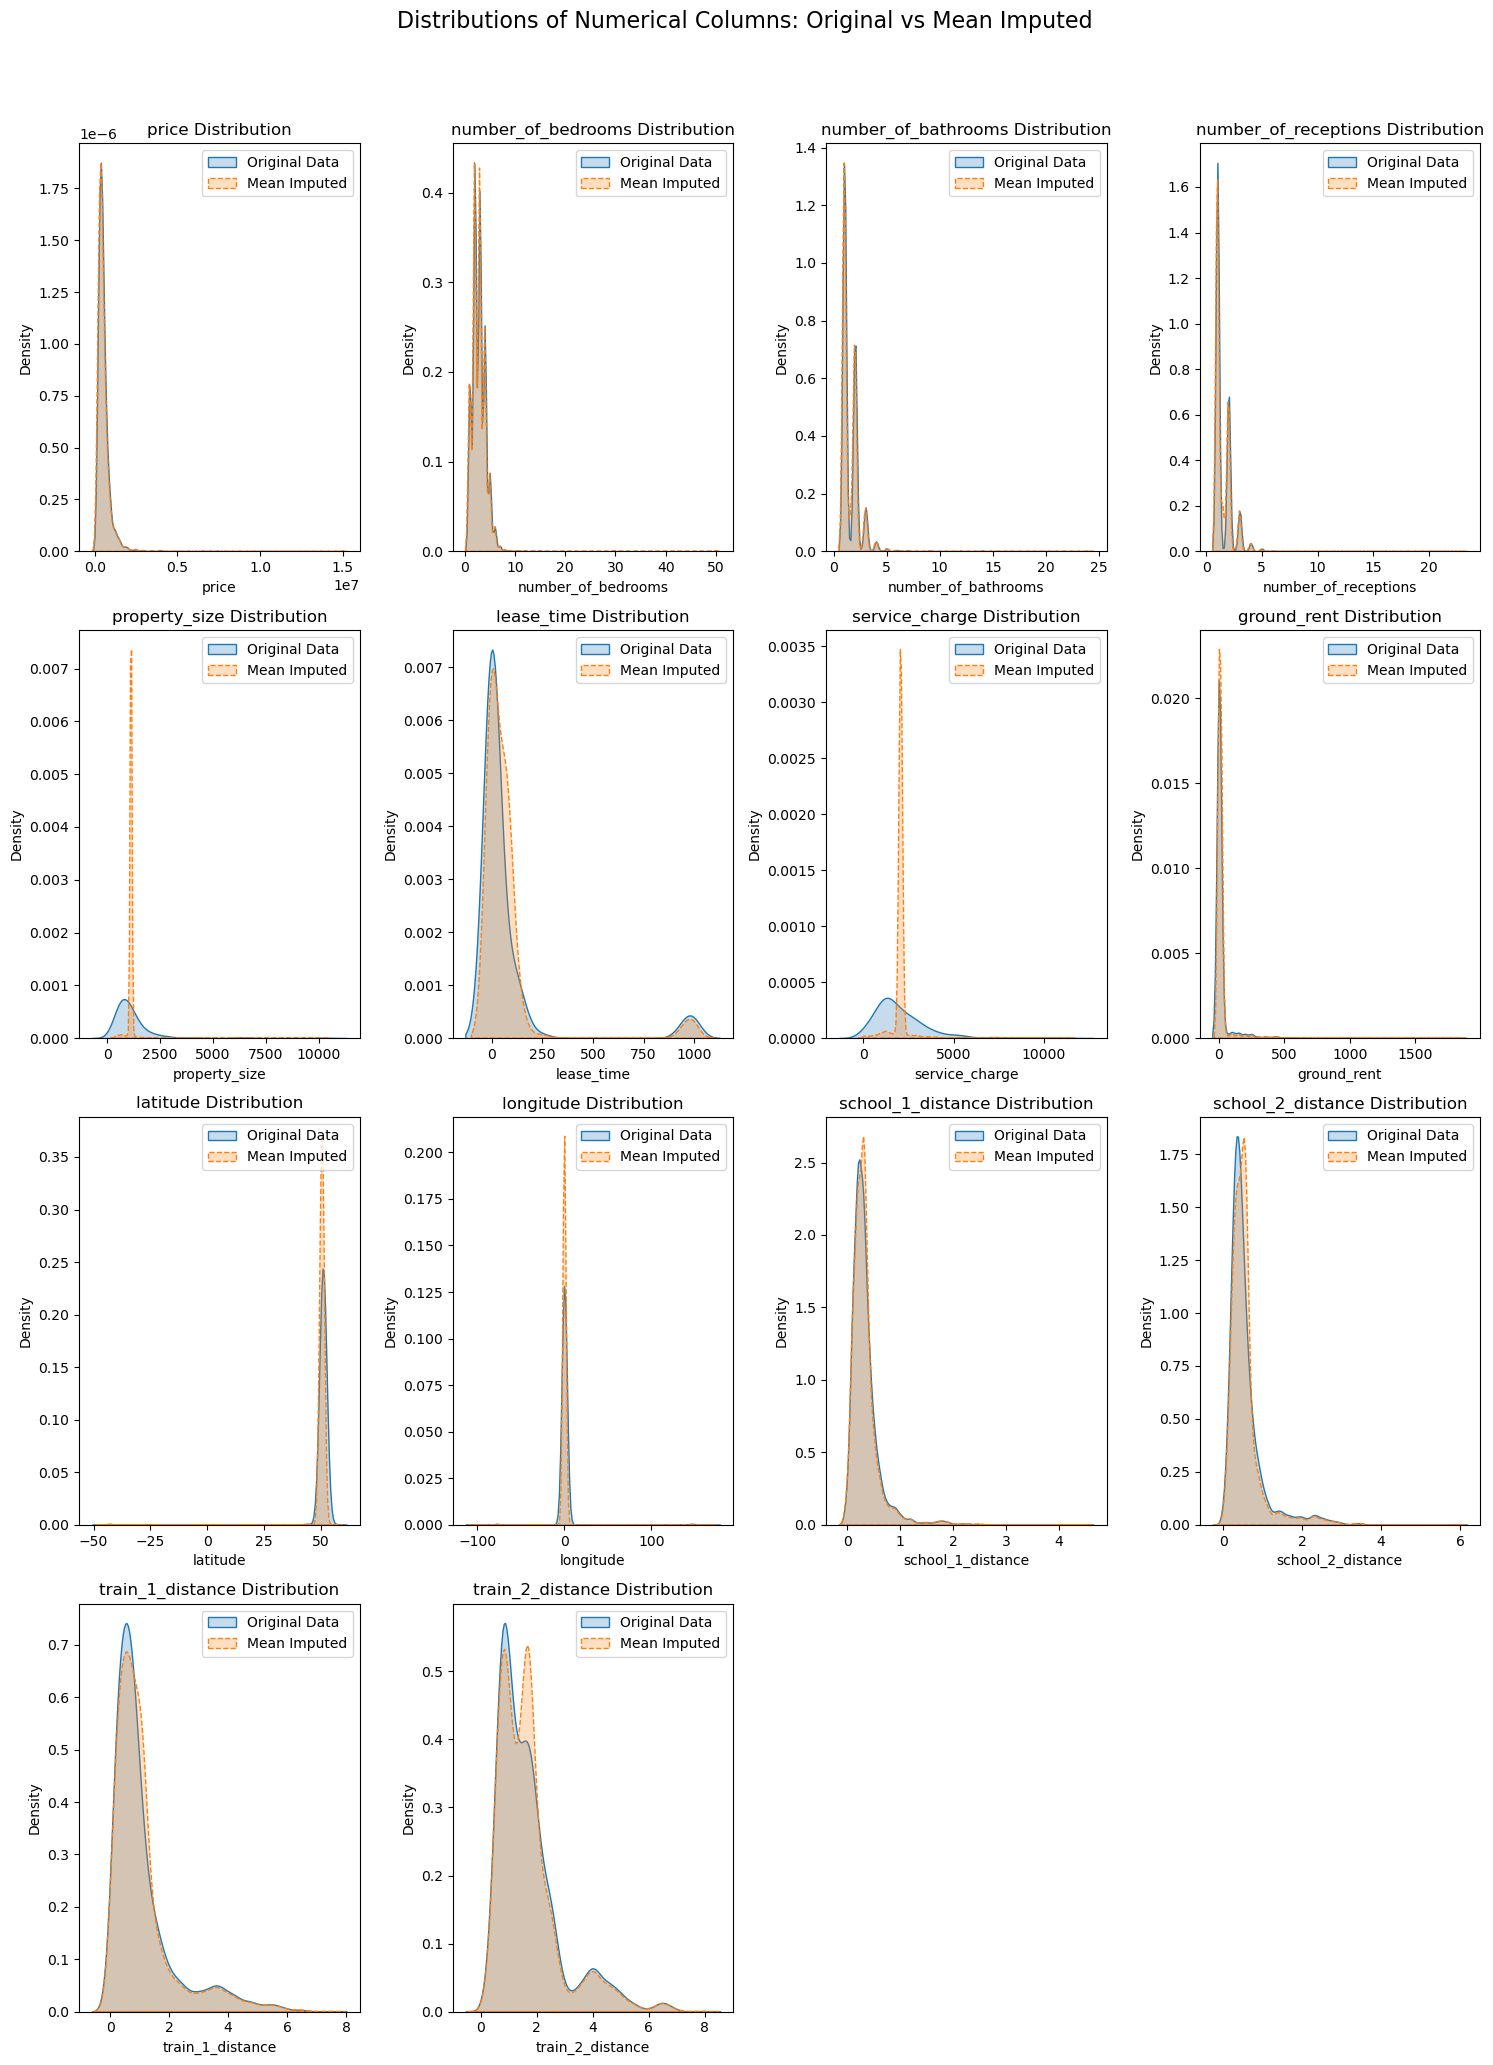

In [143]:
# Plotting
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    row = i // 4
    col = i % 4
    sns.kdeplot(df14[numerical_cols[i]], ax=axs[row, col], label='Original Data', shade=True)
    sns.kdeplot(df_mean[numerical_cols[i]], ax=axs[row, col], label='Mean Imputed', shade=True, linestyle='--')
    axs[row, col].set_title(f'{numerical_cols[i]} Distribution')
    axs[row, col].legend()

# # Clear the last two subplots
for i in [2, 3]:
    axs[3, i].axis('off')

plt.tight_layout()
plt.suptitle('Distributions of Numerical Columns: Original vs Mean Imputed', y=1.03, fontsize=16)
save_plot_to_png('Distributions of Numerical Columns_Original vs Mean Imputed')
plt.show()

### KNN Imputation

In [144]:
# Create a copy to work with
df_knn = df14.copy()

# 1. Normalize the data

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Selecting only the numerical columns for normalization, excluding 'property_id'
numerical_cols = df_knn.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'property_id']

# Apply the scaler to the selected numerical columns
df_knn[numerical_cols] = scaler.fit_transform(df_knn[numerical_cols])

# 2. Impute the missing values using KNN

# Instantiate the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the normalized data
df_knn[numerical_cols] = imputer.fit_transform(df_knn[numerical_cols])

# 3. Inverse transform the normalized and imputed data
df_knn[numerical_cols] = scaler.inverse_transform(df_knn[numerical_cols])

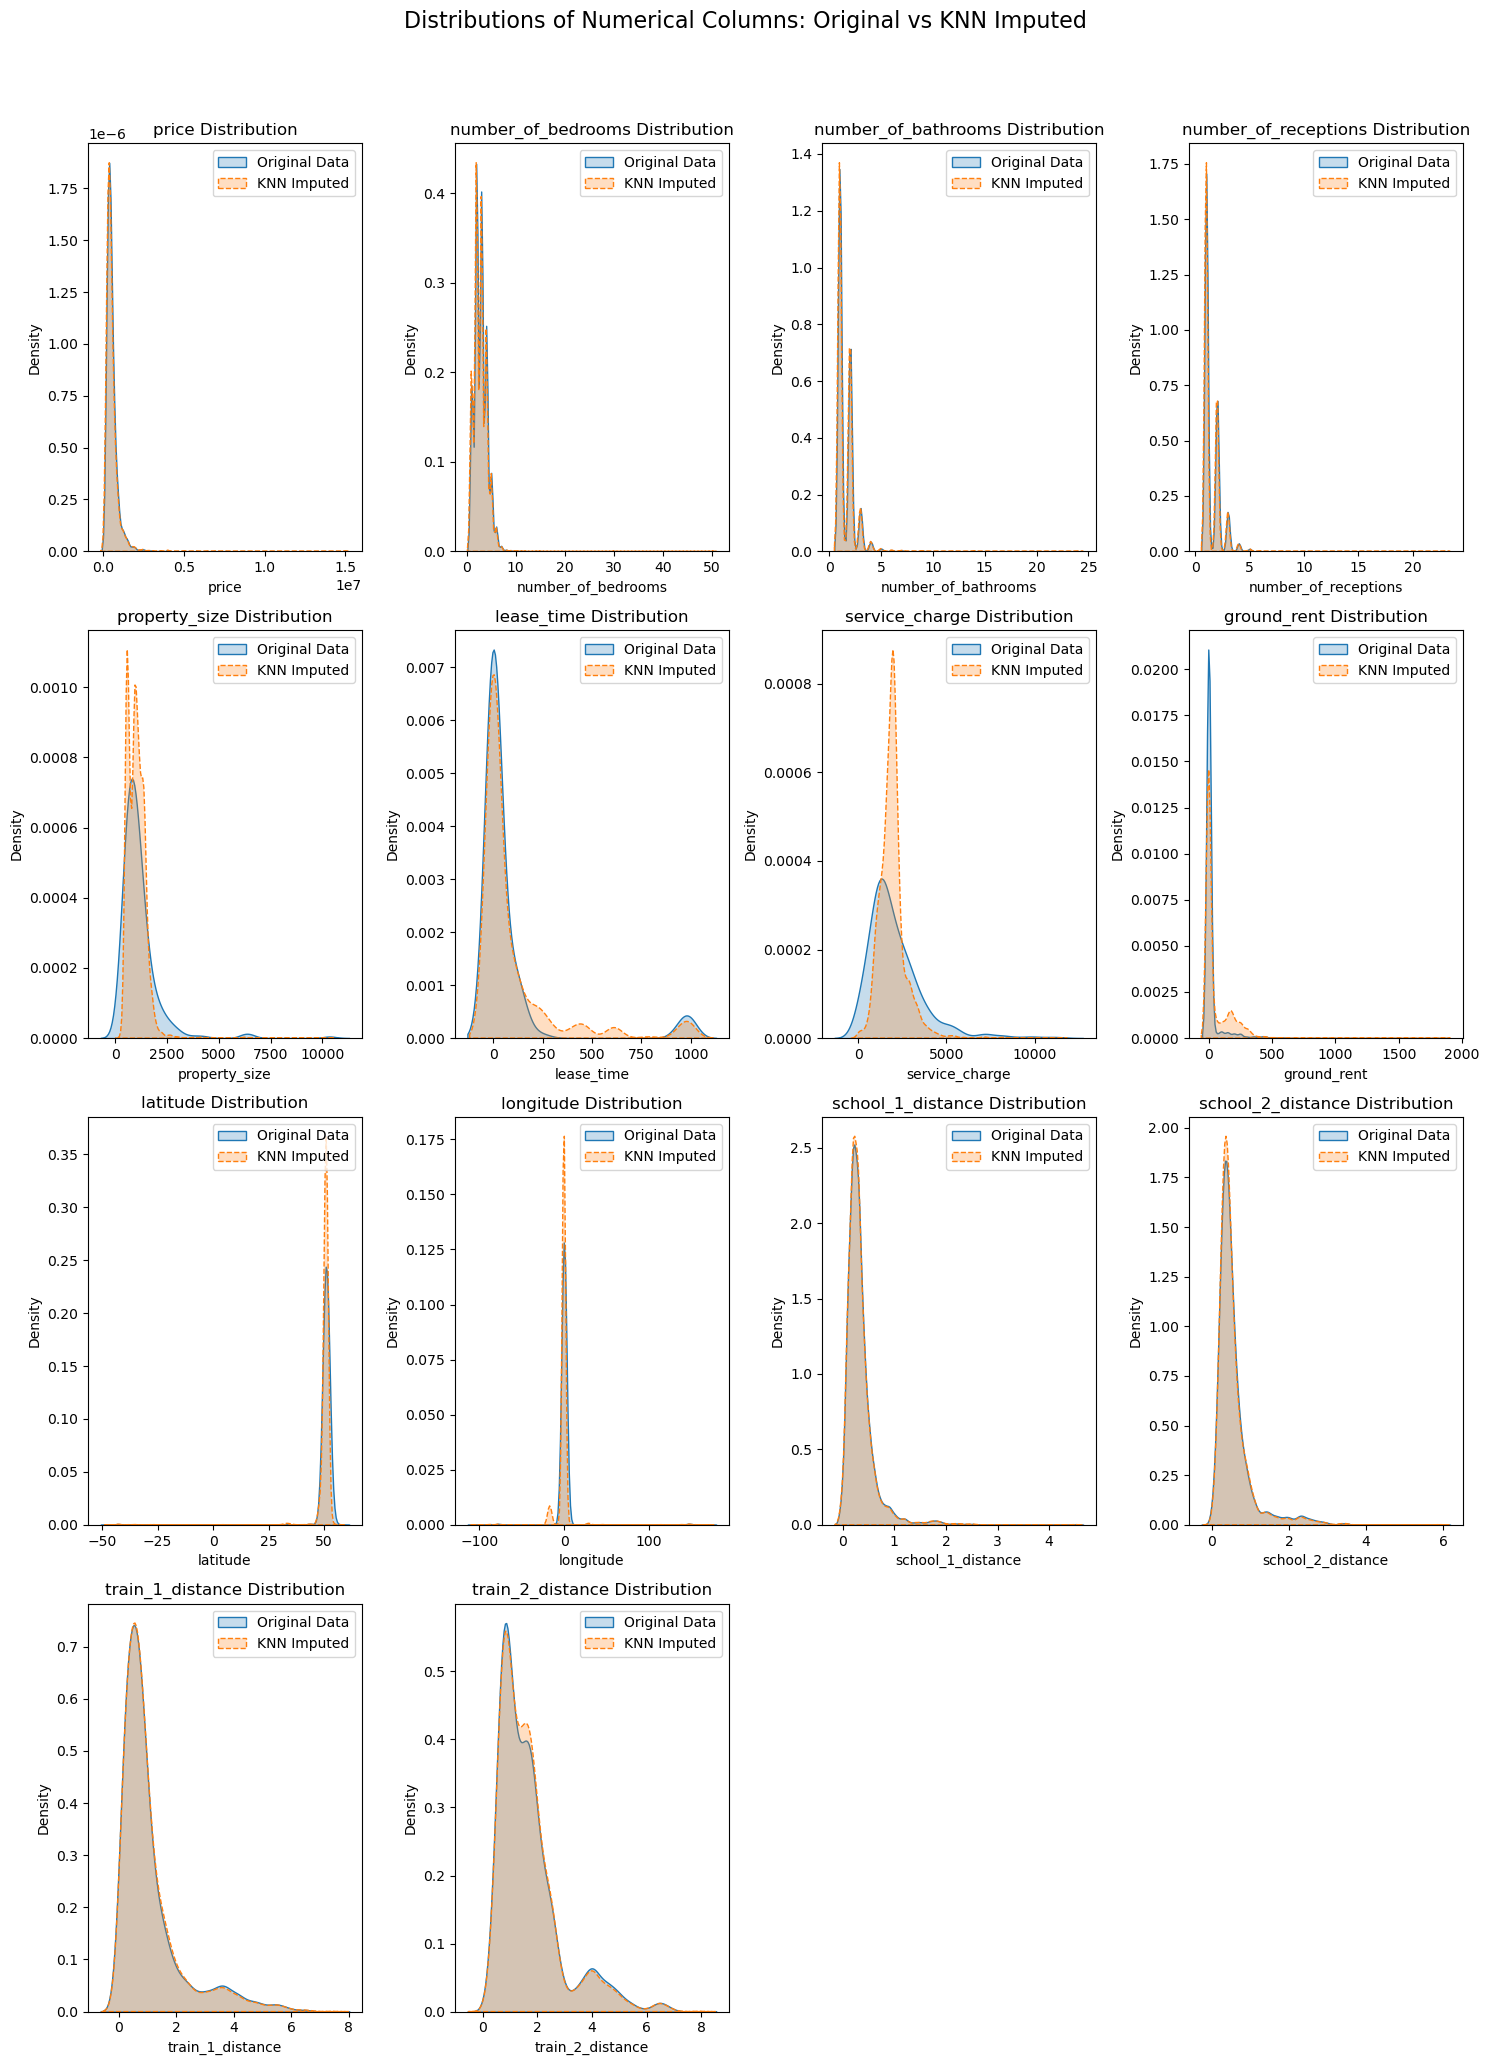

In [239]:
# Plotting
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    row = i // 4
    col = i % 4
    sns.kdeplot(df14[numerical_cols[i]], ax=axs[row, col], label='Original Data', shade=True)
    sns.kdeplot(df_knn[numerical_cols[i]], ax=axs[row, col], label='KNN Imputed', shade=True, linestyle='--')
    axs[row, col].set_title(f'{numerical_cols[i]} Distribution')
    axs[row, col].legend()

# # Clear the last two subplots
for i in [2, 3]:
    axs[3, i].axis('off')

plt.tight_layout()
plt.suptitle('Distributions of Numerical Columns: Original vs KNN Imputed', y=1.03, fontsize=16)
save_plot_to_png('Distributions of Numerical Columns_Original vs KNN Imputed')
plt.show()

### Complex Imputation (MICE)

In [146]:
# Make a copy of the data
df_mice = df14.copy()

# Normalize the data
scaler = MinMaxScaler()
numerical_cols = df_mice.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col != 'property_id']
df_mice[numerical_cols] = scaler.fit_transform(df_mice[numerical_cols])

# MICE Imputation
imputer = IterativeImputer(max_iter=10, random_state=42)
df_mice[numerical_cols] = imputer.fit_transform(df_mice[numerical_cols])

# Inverse transform
df_mice[numerical_cols] = scaler.inverse_transform(df_mice[numerical_cols])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


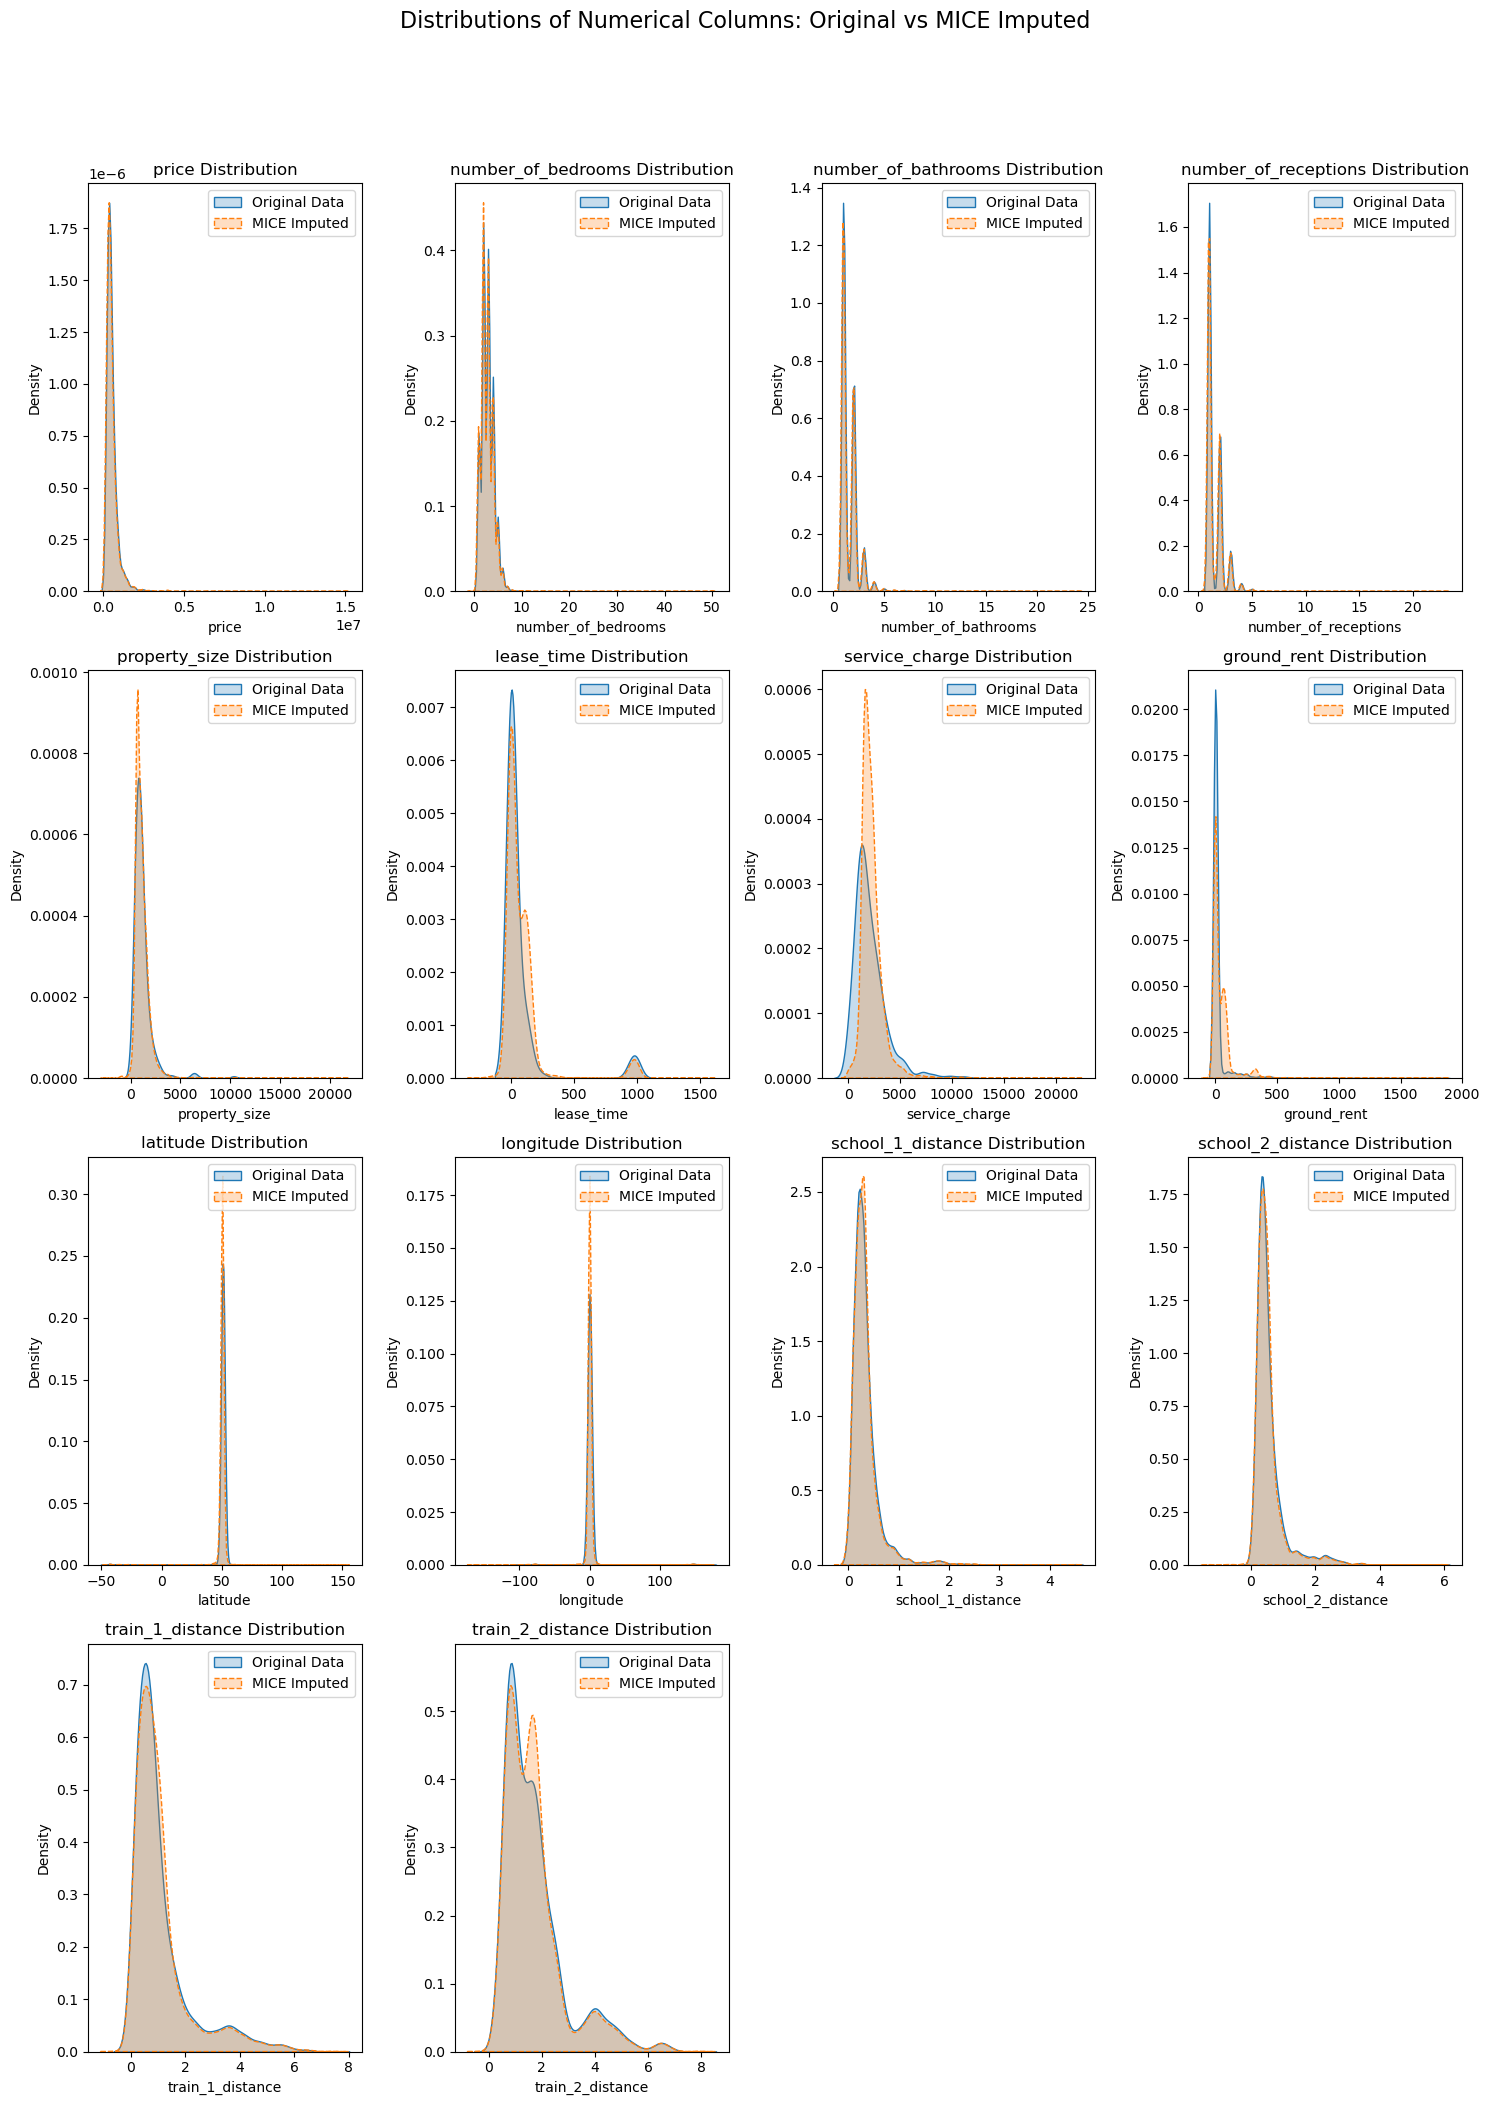

In [147]:
# Plotting
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    row = i // 4
    col = i % 4
    sns.kdeplot(df14[numerical_cols[i]], ax=axs[row, col], label='Original Data', shade=True)
    sns.kdeplot(df_mice[numerical_cols[i]], ax=axs[row, col], label='MICE Imputed', shade=True, linestyle='--')
    axs[row, col].set_title(f'{numerical_cols[i]} Distribution')
    axs[row, col].legend()

# # Clear the last two subplots
for i in [2, 3]:
    axs[3, i].axis('off')

plt.tight_layout()
plt.suptitle('Distributions of Numerical Columns: Original vs MICE Imputed', y=1.05, fontsize=16)
save_plot_to_png('Distributions of Numerical Columns_Original vs MICE Imputed')
plt.show()

In [148]:
df14.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,4720.000000,4.720000e+03,4622.000000,4530.000000,4371.000000,275.000000,3234.000000,552.000000,2818.000000,2333.000000,2333.000000,4293.000000,3856.000000,4293.000000,4293.000000
mean,2606.587076,5.186434e+05,2.831242,1.554084,1.473118,1127.014545,70.305813,2074.018116,19.343151,50.131680,0.508414,0.331283,0.557832,1.088749,1.683625
std,1497.936105,4.603426e+05,1.520712,0.921427,0.803823,988.306356,218.925520,1593.802532,83.774608,7.524717,14.324195,0.291303,0.485682,1.117071,1.167203
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,241.000000,0.000000,1.000000,0.000000,-45.948929,-104.771187,0.000000,0.000000,0.000000,0.100000
25%,1288.750000,3.000000e+05,2.000000,1.000000,1.000000,646.000000,0.000000,1100.000000,0.000000,50.810425,-0.235677,0.200000,0.300000,0.400000,0.800000
50%,2625.500000,4.250000e+05,3.000000,1.000000,1.000000,904.000000,0.000000,1636.500000,0.000000,50.827091,-0.135614,0.300000,0.400000,0.700000,1.400000
75%,3896.250000,6.000000e+05,4.000000,2.000000,2.000000,1264.500000,0.000000,2689.500000,0.000000,50.840572,0.222136,0.400000,0.600000,1.300000,2.000000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,10347.000000,999.000000,11406.000000,1848.000000,56.557793,170.329300,4.500000,5.900000,7.400000,7.900000


In [149]:
df_mean.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,4720.000000,4.720000e+03,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000
mean,2606.587076,5.186434e+05,2.831242,1.554084,1.473118,1127.014545,70.305813,2074.018116,19.343151,50.131680,0.508414,0.331283,0.557832,1.088749,1.683625
std,1497.936105,4.603426e+05,1.504839,0.902687,0.773528,238.145227,181.206701,544.609639,64.726309,5.289681,10.069537,0.277811,0.438974,1.065334,1.113144
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,241.000000,0.000000,1.000000,0.000000,-45.948929,-104.771187,0.000000,0.000000,0.000000,0.100000
25%,1288.750000,3.000000e+05,2.000000,1.000000,1.000000,1127.014545,0.000000,2074.018116,0.000000,50.131680,-0.135340,0.200000,0.300000,0.400000,0.900000
50%,2625.500000,4.250000e+05,3.000000,1.000000,1.000000,1127.014545,0.000000,2074.018116,0.000000,50.131680,0.508414,0.300000,0.500000,0.800000,1.500000
75%,3896.250000,6.000000e+05,4.000000,2.000000,2.000000,1127.014545,70.305813,2074.018116,19.343151,50.826749,0.508414,0.400000,0.557832,1.200000,1.900000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,10347.000000,999.000000,11406.000000,1848.000000,56.557793,170.329300,4.500000,5.900000,7.400000,7.900000


In [150]:
df_knn.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,4720.000000,4.720000e+03,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000
mean,2606.587076,5.186434e+05,2.807288,1.556356,1.466144,1013.908898,99.101780,1944.479407,55.021398,50.245572,-0.599689,0.331949,0.548877,1.086297,1.681975
std,1497.936105,4.603426e+05,1.519097,0.916636,0.786443,463.005789,215.587497,787.829405,104.161460,5.490538,11.086898,0.280718,0.451391,1.078225,1.126962
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,241.000000,0.000000,1.000000,0.000000,-45.948929,-104.771187,0.000000,0.000000,0.000000,0.100000
25%,1288.750000,3.000000e+05,2.000000,1.000000,1.000000,639.400000,0.000000,1544.600000,0.000000,50.813453,-0.338338,0.200000,0.300000,0.400000,0.900000
50%,2625.500000,4.250000e+05,3.000000,1.000000,1.000000,958.100000,0.000000,1956.000000,0.000000,50.821912,-0.201506,0.300000,0.400000,0.700000,1.400000
75%,3896.250000,6.000000e+05,4.000000,2.000000,2.000000,1275.800000,98.250000,2176.400000,72.700000,50.832522,-0.116932,0.400000,0.600000,1.300000,2.000000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,10347.000000,999.000000,11406.000000,1848.000000,56.557793,170.329300,4.500000,5.900000,7.400000,7.900000


In [151]:
df_mice.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,4720.000000,4.720000e+03,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000
mean,2606.587076,5.186434e+05,2.815174,1.557450,1.474472,1110.215451,82.193873,2262.597784,44.979011,50.154044,0.485182,0.331358,0.546312,1.088592,1.681910
std,1497.936105,4.603426e+05,1.512961,0.926168,0.804209,743.910870,187.587152,1115.829040,87.502831,5.718957,10.676423,0.278940,0.450189,1.067136,1.116402
min,1.000000,8.000000e+04,-0.556402,0.603043,0.686649,-2616.962288,-247.369270,-75.930285,-69.558209,-45.948929,-167.857700,-0.131303,-1.295481,-0.525163,-0.190394
25%,1288.750000,3.000000e+05,2.000000,1.000000,1.000000,678.000000,0.000000,1628.134899,0.000000,50.077021,-0.170060,0.200000,0.300000,0.400000,0.900000
50%,2625.500000,4.250000e+05,3.000000,1.000000,1.000000,969.000000,0.000000,2048.260668,0.000000,50.807686,0.128374,0.300000,0.400000,0.800000,1.500000
75%,3896.250000,6.000000e+05,4.000000,2.000000,2.000000,1378.087810,109.430917,2608.287573,64.683311,50.836694,0.539874,0.400000,0.600000,1.200000,2.000000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,21542.583893,1527.493099,22012.822504,1848.000000,152.551750,170.329300,4.500000,5.900000,7.400000,7.900000


In [152]:
# rounding values
df_knn['number_of_bedrooms'] = df_knn['number_of_bedrooms'].apply(round)
df_knn['number_of_bathrooms'] = df_knn['number_of_bathrooms'].apply(round)
df_knn['number_of_receptions'] = df_knn['number_of_receptions'].apply(round)

In [153]:
df_knn.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,4720.000000,4.720000e+03,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000
mean,2606.587076,5.186434e+05,2.805508,1.554661,1.463559,1013.908898,99.101780,1944.479407,55.021398,50.245572,-0.599689,0.331949,0.548877,1.086297,1.681975
std,1497.936105,4.603426e+05,1.521998,0.918356,0.789544,463.005789,215.587497,787.829405,104.161460,5.490538,11.086898,0.280718,0.451391,1.078225,1.126962
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,241.000000,0.000000,1.000000,0.000000,-45.948929,-104.771187,0.000000,0.000000,0.000000,0.100000
25%,1288.750000,3.000000e+05,2.000000,1.000000,1.000000,639.400000,0.000000,1544.600000,0.000000,50.813453,-0.338338,0.200000,0.300000,0.400000,0.900000
50%,2625.500000,4.250000e+05,3.000000,1.000000,1.000000,958.100000,0.000000,1956.000000,0.000000,50.821912,-0.201506,0.300000,0.400000,0.700000,1.400000
75%,3896.250000,6.000000e+05,4.000000,2.000000,2.000000,1275.800000,98.250000,2176.400000,72.700000,50.832522,-0.116932,0.400000,0.600000,1.300000,2.000000
max,5189.000000,1.500000e+07,50.000000,24.000000,23.000000,10347.000000,999.000000,11406.000000,1848.000000,56.557793,170.329300,4.500000,5.900000,7.400000,7.900000


In [154]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4720 entries, 0 to 4889
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4720 non-null   int64  
 1   price                 4720 non-null   float64
 2   house_type            4720 non-null   object 
 3   number_of_bedrooms    4720 non-null   int64  
 4   number_of_bathrooms   4720 non-null   int64  
 5   number_of_receptions  4720 non-null   int64  
 6   property_size         4720 non-null   float64
 7   tenure                4720 non-null   object 
 8   lease_time            4720 non-null   float64
 9   service_charge        4720 non-null   float64
 10  tax_band              4720 non-null   object 
 11  ground_rent           4720 non-null   float64
 12  listing_features      4720 non-null   object 
 13  description_text      4720 non-null   object 
 14  property_link         4720 non-null   object 
 15  postcode             

In [222]:
def remove_outliers(df):
    """
    Remove outliers from a dataframe based on the IQR, Z-Score, and 1-percentile of its numerical columns.
    Observations are removed only if they are considered outliers by all three methods.
    
    Args:
    - df (pd.DataFrame): Input DataFrame
    
    Returns:
    - pd.DataFrame: DataFrame with outliers removed
    """
    # Copy the dataframe
    df_out = df.copy()
    
    # For each numerical column, compute the IQR, Z-Score and filter out outliers
    for col in df_out.select_dtypes(include=['number']).columns:
        # IQR method
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = (df_out[col] < (Q1 - 1.5 * IQR)) | (df_out[col] > (Q3 + 1.5 * IQR))
        
        # Z-Score method
        z_scores = zscore(df_out[col].dropna())
        z_outliers = (np.abs(z_scores) > 3)
        
        # 1-percentile method
        lower_bound = df_out[col].quantile(0.01)
        upper_bound = df_out[col].quantile(0.99)
        percentile_outliers = (df_out[col] < lower_bound) | (df_out[col] > upper_bound)
        
        # Combine the methods
        combined_outliers = iqr_outliers & z_outliers & percentile_outliers
        df_out = df_out[~combined_outliers]
        
    return df_out

df_new = remove_outliers(df_knn)

In [204]:
# df_new = df_knn.copy()

In [223]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271 entries, 0 to 4889
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4271 non-null   int64  
 1   price                 4271 non-null   float64
 2   house_type            4271 non-null   object 
 3   number_of_bedrooms    4271 non-null   int64  
 4   number_of_bathrooms   4271 non-null   int64  
 5   number_of_receptions  4271 non-null   int64  
 6   property_size         4271 non-null   float64
 7   tenure                4271 non-null   object 
 8   lease_time            4271 non-null   float64
 9   service_charge        4271 non-null   float64
 10  tax_band              4271 non-null   object 
 11  ground_rent           4271 non-null   float64
 12  listing_features      4271 non-null   object 
 13  description_text      4271 non-null   object 
 14  property_link         4271 non-null   object 
 15  postcode             

In [224]:
df_new.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance
count,4271.000000,4.271000e+03,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000
mean,2608.432686,4.734938e+05,2.721143,1.469445,1.411847,978.594662,93.130321,1886.499555,49.921658,50.692048,-1.122907,0.305076,0.487085,0.969239,1.562079
std,1505.265798,2.658397e+05,1.179338,0.651743,0.642478,350.593746,200.652234,629.998110,88.221213,0.645810,3.932137,0.200803,0.301652,0.850722,0.913690
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,241.000000,0.000000,1.000000,0.000000,47.337374,-18.278708,0.000000,0.000000,0.000000,0.100000
25%,1308.500000,2.999500e+05,2.000000,1.000000,1.000000,635.100000,0.000000,1518.700000,0.000000,50.813757,-0.339924,0.200000,0.300000,0.400000,0.900000
50%,2609.000000,4.200000e+05,3.000000,1.000000,1.000000,944.400000,0.000000,1936.800000,0.000000,50.821951,-0.202380,0.300000,0.400000,0.700000,1.400000
75%,3909.500000,5.750000e+05,3.000000,2.000000,2.000000,1242.400000,97.000000,2175.500000,62.600000,50.831991,-0.120871,0.400000,0.600000,1.200000,1.900000
max,5189.000000,2.000000e+06,7.000000,4.000000,4.000000,2194.000000,996.000000,4445.400000,360.000000,56.557793,8.224543,1.700000,2.400000,4.700000,4.800000


### Feature Engineering

In [225]:
df_new['listing_features'] = df_new['listing_features'].apply(lambda x: x.split('\n'))
df_new['listing_features']

0       [Share of freehold, Two-Bedroom First Floor Ap...
1       [No Forward Chain, Passenger Lift, Located Nex...
2       [Freehold, Attractive 3 Bedroom Family Home Wi...
3       [Leasehold, 2 Double Bedrooms, No Onward Chain...
4       [Leasehold, Sale by Modern Auction (T&Cs apply...
                              ...                        
4881    [Freehold, Four bed semi-detached family home,...
4884    [Freehold, 3/4 Bedrooms, 2/3 Reception rooms, ...
4886    [Freehold, Grade II listed, Mixed use property...
4887    [Leasehold, Off street parking, Central heatin...
4889    [A modernised, first floor retirement apartmen...
Name: listing_features, Length: 4271, dtype: object

In [226]:
# hasGarden
df_new['has_garden'] = df_new['listing_features'].apply(
    lambda features: 1 if 'garden' in [item.lower() for item in features] else 0)

In [227]:
# hasParking
df_new['has_parking'] = df_new['listing_features'].apply(
    lambda features: 1 if 'garage' in [item.lower() for item in features] or 'parking' in [item.lower() for item in features] else 0)


In [228]:
df_new['has_parking'].describe()

count    4271.000000
mean        0.094591
std         0.292684
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: has_parking, dtype: float64

In [229]:
df_new[df_new['has_parking'] == 1]

,property_id,price,house_type,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,tenure,lease_time,service_charge,...,property_link,postcode,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance,has_garden,has_parking
16,20,585000.0,semi-detached house,3,1,1,984.0,freehold,0.0,2073.4,...,https://www.zoopla.co.uk/for-sale/details/6514...,BN1,50.847343,-0.130938,0.1,0.3,0.5,0.8,0,1
24,28,400000.0,semi-detached house,3,1,2,1066.0,freehold,0.0,2224.8,...,https://www.zoopla.co.uk/for-sale/details/6513...,BN1,48.027041,-15.586411,0.1,0.2,0.2,0.9,0,1
98,103,700000.0,detached house,4,1,1,1129.2,not available,0.0,1157.0,...,https://www.zoopla.co.uk/for-sale/details/6505...,BN1,50.842285,-0.129724,0.2,0.3,0.5,0.6,0,1
119,124,600000.0,bungalow,3,1,1,932.6,freehold,0.0,2136.4,...,https://www.zoopla.co.uk/for-sale/details/6503...,BN1,48.018353,-15.504051,0.2,0.5,0.9,1.7,0,1
131,136,265000.0,flat,2,1,1,708.2,not available,408.6,2286.4,...,https://www.zoopla.co.uk/for-sale/details/6500...,BN1,50.848660,-0.152661,0.4,0.5,0.7,1.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,5117,575000.0,bungalow,3,1,1,932.6,freehold,0.0,2176.4,...,https://www.zoopla.co.uk/for-sale/details/6468...,BN7,50.868504,-0.007972,0.4,0.5,0.9,2.4,0,1
4830,5128,850000.0,town house,3,2,1,1403.0,share of freehold,996.0,2337.2,...,https://www.zoopla.co.uk/for-sale/details/6447...,BN7,50.870598,0.011349,0.3,0.3,0.1,2.3,0,1
4843,5141,450000.0,end terrace house,4,2,1,1262.4,freehold,0.0,1956.0,...,https://www.zoopla.co.uk/for-sale/details/6434...,BN7,50.877422,0.021993,0.4,0.6,0.7,2.3,0,1
4852,5150,425000.0,terraced house,3,1,1,932.6,freehold,0.0,2573.6,...,https://www.zoopla.co.uk/for-sale/details/6418...,BN7,48.020140,-15.573208,0.2,0.4,0.7,2.3,0,1


In [230]:
# indicator if a property is an old or new build
df_new['old_new'] = df_new['property_link'].apply(lambda x: 'Y' if 'for-sale' in x.lower() else 'N')
df_new['old_new']

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
4881    Y
4884    Y
4886    Y
4887    N
4889    Y
Name: old_new, Length: 4271, dtype: object

In [231]:
# count of words in property description
df_new['word_count'] = df_new['description_text'].apply(lambda x: len(x.split()))

In [232]:
df_new.describe()

,property_id,price,number_of_bedrooms,number_of_bathrooms,number_of_receptions,property_size,lease_time,service_charge,ground_rent,latitude,longitude,school_1_distance,school_2_distance,train_1_distance,train_2_distance,has_garden,has_parking,word_count
count,4271.000000,4.271000e+03,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000,4271.000000
mean,2608.432686,4.734938e+05,2.721143,1.469445,1.411847,978.594662,93.130321,1886.499555,49.921658,50.692048,-1.122907,0.305076,0.487085,0.969239,1.562079,0.020604,0.094591,379.599860
std,1505.265798,2.658397e+05,1.179338,0.651743,0.642478,350.593746,200.652234,629.998110,88.221213,0.645810,3.932137,0.200803,0.301652,0.850722,0.913690,0.142071,0.292684,243.234331
min,1.000000,8.000000e+04,1.000000,1.000000,1.000000,241.000000,0.000000,1.000000,0.000000,47.337374,-18.278708,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,19.000000
25%,1308.500000,2.999500e+05,2.000000,1.000000,1.000000,635.100000,0.000000,1518.700000,0.000000,50.813757,-0.339924,0.200000,0.300000,0.400000,0.900000,0.000000,0.000000,228.000000
50%,2609.000000,4.200000e+05,3.000000,1.000000,1.000000,944.400000,0.000000,1936.800000,0.000000,50.821951,-0.202380,0.300000,0.400000,0.700000,1.400000,0.000000,0.000000,327.000000
75%,3909.500000,5.750000e+05,3.000000,2.000000,2.000000,1242.400000,97.000000,2175.500000,62.600000,50.831991,-0.120871,0.400000,0.600000,1.200000,1.900000,0.000000,0.000000,467.000000
max,5189.000000,2.000000e+06,7.000000,4.000000,4.000000,2194.000000,996.000000,4445.400000,360.000000,56.557793,8.224543,1.700000,2.400000,4.700000,4.800000,1.000000,1.000000,2184.000000


In [233]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271 entries, 0 to 4889
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4271 non-null   int64  
 1   price                 4271 non-null   float64
 2   house_type            4271 non-null   object 
 3   number_of_bedrooms    4271 non-null   int64  
 4   number_of_bathrooms   4271 non-null   int64  
 5   number_of_receptions  4271 non-null   int64  
 6   property_size         4271 non-null   float64
 7   tenure                4271 non-null   object 
 8   lease_time            4271 non-null   float64
 9   service_charge        4271 non-null   float64
 10  tax_band              4271 non-null   object 
 11  ground_rent           4271 non-null   float64
 12  listing_features      4271 non-null   object 
 13  description_text      4271 non-null   object 
 14  property_link         4271 non-null   object 
 15  postcode             

## Saving dataset

In [234]:
df_new.drop(columns=['property_id','listing_features', 'property_link'], inplace=True)

In [235]:
# Save dataset
df_new.to_csv('./Data/brighton_data_processed.csv', index=False)